In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [2]:
data_all = "Output/2019_2020_mixed_beverage"


df_all = pd.read_csv(data_all, encoding="utf-8")


In [3]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
df_all.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
0,32068897456,"HC&K, LLC",7035 W GRAND PKWY S STE 10,RICHMOND,TX,77407.0,79,1,TOP SUSHI,7035 W GRAND PKWY S STE 10,...,2019-01-16T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
1,32051593963,J & J ACKERMAN CORP.,PO BOX 939,GRANGER,TX,76530.0,246,3,COTTON COUNTRY CLUB,212 E DAVILLA ST,...,2019-01-28T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
2,32046106475,FJ RESTAURANT INC,9300 S INTERSTATE 35 STE 8500 # 431,AUSTIN,TX,78748.0,227,2,TAQUERIA MEXICANO GRILLE,10207 CHINA SPRING RD STE 140,...,2019-06-19T00:00:00.000,2019-01-31T00:00:00.000,10013,0,8648,0,18661,NaN,2019,1
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   taxpayer_number                      120000 non-null  int64  
 1   taxpayer_name                        120000 non-null  object 
 2   taxpayer_address                     120000 non-null  object 
 3   taxpayer_city                        120000 non-null  object 
 4   taxpayer_state                       119912 non-null  object 
 5   taxpayer_zip                         119912 non-null  float64
 6   taxpayer_county                      120000 non-null  int64  
 7   location_number                      120000 non-null  int64  
 8   location_name                        120000 non-null  object 
 9   location_address                     120000 non-null  object 
 10  location_city                        120000 non-null  object 
 11  location_stat

In [5]:
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities.location_city

3             HOUSTON
4             HOUSTON
5              DALLAS
10             AUSTIN
12            HOUSTON
             ...     
119989        HOUSTON
119990    SAN ANTONIO
119994        HOUSTON
119996    SAN ANTONIO
119998        HOUSTON
Name: location_city, Length: 44006, dtype: object

In [6]:
dfcities.location_city.value_counts()

HOUSTON        14723
DALLAS          9582
AUSTIN          7891
SAN ANTONIO     7690
FORT WORTH      4120
Name: location_city, dtype: int64

In [7]:
dfcities.groupby("location_city").total_receipts.mean()

location_city
AUSTIN         51995.098720
DALLAS         46575.526299
FORT WORTH     36564.576214
HOUSTON        39860.013720
SAN ANTONIO    40220.662419
Name: total_receipts, dtype: float64

In [8]:
dfcities.groupby("location_city").total_receipts.var()

location_city
AUSTIN         6.845727e+09
DALLAS         7.301025e+09
FORT WORTH     3.506818e+09
HOUSTON        5.384415e+09
SAN ANTONIO    3.429163e+09
Name: total_receipts, dtype: float64

<AxesSubplot:title={'center':'total_receipts'}, xlabel='location_city'>

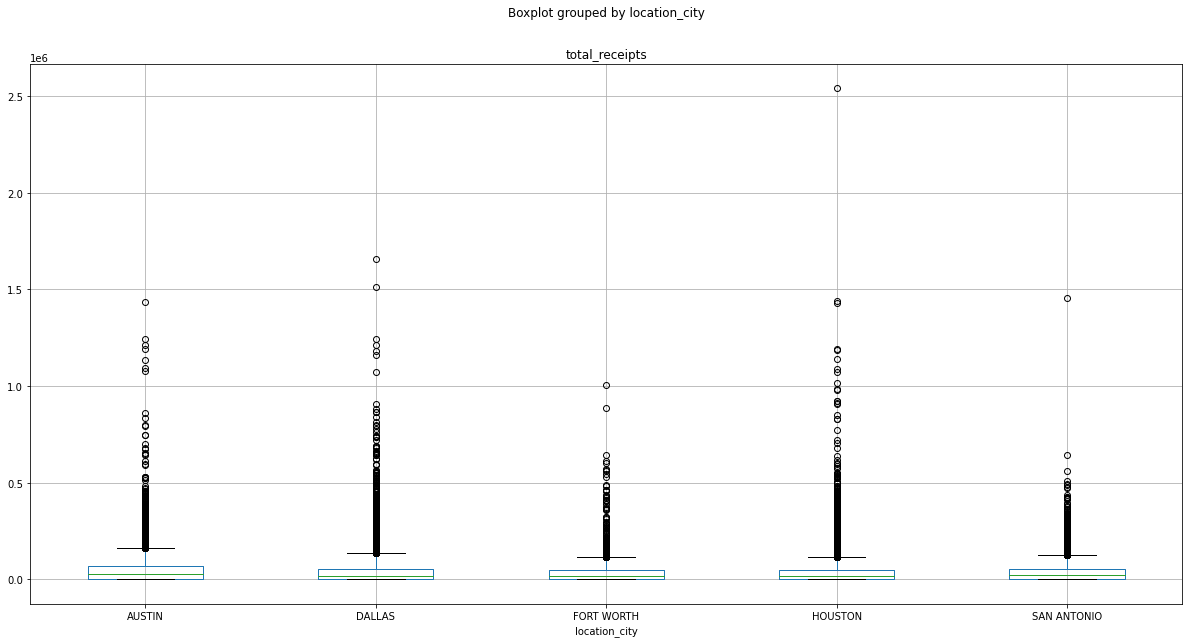

In [9]:
dfcities.boxplot("total_receipts", by="location_city", figsize=(20, 10))

In [ ]:
plt.figure(figsize=(10,6))

sns.pairplot(data=dfcities)

plt.show()

In [11]:
group1 = dfcities[dfcities["location_city"] == "HOUSTON"]["total_receipts"]
group2 = dfcities[dfcities["location_city"] == "DALLAS"]["total_receipts"]
group3 = dfcities[dfcities["location_city"] == "FORT WORTH"]["total_receipts"]
group4 = dfcities[dfcities["location_city"] == "SAN ANTONIO"]["total_receipts"]
group5 = dfcities[dfcities["location_city"] == "AUSTIN"]["total_receipts"]

In [12]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=51.08573623104522, pvalue=5.517933878848488e-43)

In [13]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))
print(stats.ttest_ind(group1, group5, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))
print(stats.ttest_ind(group2, group5, equal_var=False))

print(stats.ttest_ind(group3, group4, equal_var=False))
print(stats.ttest_ind(group3, group5, equal_var=False))

print(stats.ttest_ind(group4, group5, equal_var=False))

Ttest_indResult(statistic=-6.323955524500319, pvalue=2.6087290237243133e-10)
Ttest_indResult(statistic=2.9873664202754107, pvalue=0.0028224520240990414)
Ttest_indResult(statistic=-0.4003158269516864, pvalue=0.6889284485817894)
Ttest_indResult(statistic=-10.927408149752068, pvalue=1.0919843203377871e-27)
Ttest_indResult(statistic=7.882096709171206, pvalue=3.5230751832846694e-15)
Ttest_indResult(statistic=5.782223587880066, pvalue=7.502232431141035e-09)
Ttest_indResult(statistic=-4.2456035119322095, pvalue=2.191615910359415e-05)
Ttest_indResult(statistic=-3.2101891786665195, pvalue=0.0013315029796098306)
Ttest_indResult(statistic=-11.770093411308066, pvalue=8.670733397111417e-32)
Ttest_indResult(statistic=-10.273809990921926, pvalue=1.12781256484781e-24)


In [ ]:
stats.f_oneway(group1, group2, group3)